# H5 file example usage 

In [47]:
import os

import h5py
from PIL import Image
import numpy as np
import pandas as pd

import sys
sys.path.append('../')
from src.get_set_data import load_set_data, recursive_load_from_h5
from src.labeling_util import load_hugo

### Load sample h5 file

In [25]:
h5_file_loc = os.path.join("h5", "sample_h5.h5")
sample_h5 = h5py.File(h5_file_loc, "r+")

### H5 file keys

In [3]:
print(sample_h5.keys())

<KeysViewHDF5 ['case_to_images', 'data_dict', 'hugo_symbols', 'image_to_sample', 'images', 'labels', 'mutational_signatures']>


|Key|Type|
|---|----|
|case_to_images| Nested dictionary|
|data_dict| Nested dictionary|
|hugo_symbols| Pandas table|
|image_to_sample| Nested dictionary|
|images| Nested groups with datasets|
|labels| Pandas table|
|mutational_signatures| Pandas table|

### Loading Image from h5 file
sample_h5["images"][image_id][zoom][dataset][()]

dataset = images/ file_name/ reject_images/ reject_file_name

Image type:  <class 'numpy.ndarray'>
Image shape: (255, 255, 3)


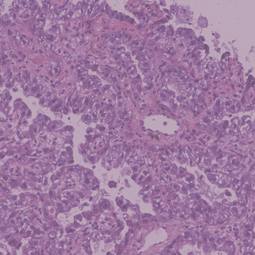

In [45]:
data = sample_h5["images"]['TCGA-44-7671-01A-01-BS1.914604a2-de9c-404d-9fa5-23fbd0b76da3']["5.0"]["images"][()]
image = data[1,:,:,:]
print(f"Image type:  {type(image)}")
print(f"Image shape: {image.shape}")
Image.fromarray(image, "RGB")

### Loading pandas table from h5 file

In [19]:
pd.read_hdf(os.path.join("h5", "sample_h5.h5"), key="labels").head()

,case_barcode,project,case_id,demographic.gender,demographic.ethnicity,demographic.vital_status,demographic.race,demographic.age_at_index,demographic.submitter_id,demographic.days_to_birth,...,demographic.days_to_death,sample.distributor_reference,sample.diagnosis_pathologically_confirmed,sample.distance_normal_to_tumor,sample.growth_rate,sample.method_of_sample_procurement,sample.passage_count,sample.biospecimen_anatomic_site,sample.biospecimen_laterality,sample.catalog_reference
1,TCGA-GR-7353,TCGA-DLBC,c3d662ee-48d0-454a-bb0c-77d3338d3747,male,not hispanic or latino,Alive,white,36.0,TCGA-GR-7353_demographic,-13317.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-G8-6325,TCGA-DLBC,ea54dbad-1b23-41cc-9378-d4002a8fca51,male,not hispanic or latino,Alive,white,69.0,TCGA-G8-6325_demographic,-25256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TCGA-G8-6325,TCGA-DLBC,ea54dbad-1b23-41cc-9378-d4002a8fca51,male,not hispanic or latino,Alive,white,69.0,TCGA-G8-6325_demographic,-25256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TCGA-G8-6906,TCGA-DLBC,3f5a897d-1eaa-4d4c-8324-27ac07c90927,male,not hispanic or latino,Dead,white,58.0,TCGA-G8-6906_demographic,-21272.0,...,6425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TCGA-G8-6906,TCGA-DLBC,3f5a897d-1eaa-4d4c-8324-27ac07c90927,male,not hispanic or latino,Dead,white,58.0,TCGA-G8-6906_demographic,-21272.0,...,6425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load nested dictionary from h5 file

In [32]:
sample_data_dict = recursive_load_from_h5(sample_h5, "data_dict")

print(f"sample_data_dict type: {type(sample_data_dict)}")
print(F"sample_data_dict keys: {sample_data_dict.keys()}")

### Load hugo symbols

In [49]:
load_hugo(sample_h5).head()

,TNFRSF14,TAS1R2,EPHB2,PHACTR4,DCDC2B,PRKACB,SPAG17,PRRX1,SERPINC1,CCDC185,...,LTN1,CACNG2,CDKL5,EFNB1,P2RY4,TBX22,HDX,THOC2,MAGEC1,case_barcode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-GR-7353
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-G8-6325
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-G8-6906
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,TCGA-FF-8047
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-VB-A8QN


### Loading all data from h5 file

In [35]:
data = load_set_data(h5_file_loc)

print(f"Data type: {type(data)}")
print(F"Data keys: {data.keys()}")

Data type: <class 'dict'>
Data keys: dict_keys(['data dict', 'image to sample', 'case to images', 'labels', 'mutational signatures', 'hugo symbols'])


In [182]:
sample_h5.close()